In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('data.csv')
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [ ]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,Star color_Blue-White,...,Star color_Yellowish White,Star color_white,Star color_yellow-white,Star color_yellowish,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O
0,3068,0.002400,0.1700,16.12,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,3042,0.000500,0.1542,16.60,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2600,0.000300,0.1020,18.70,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2800,0.000200,0.1600,16.65,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1939,0.000138,0.1030,20.06,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


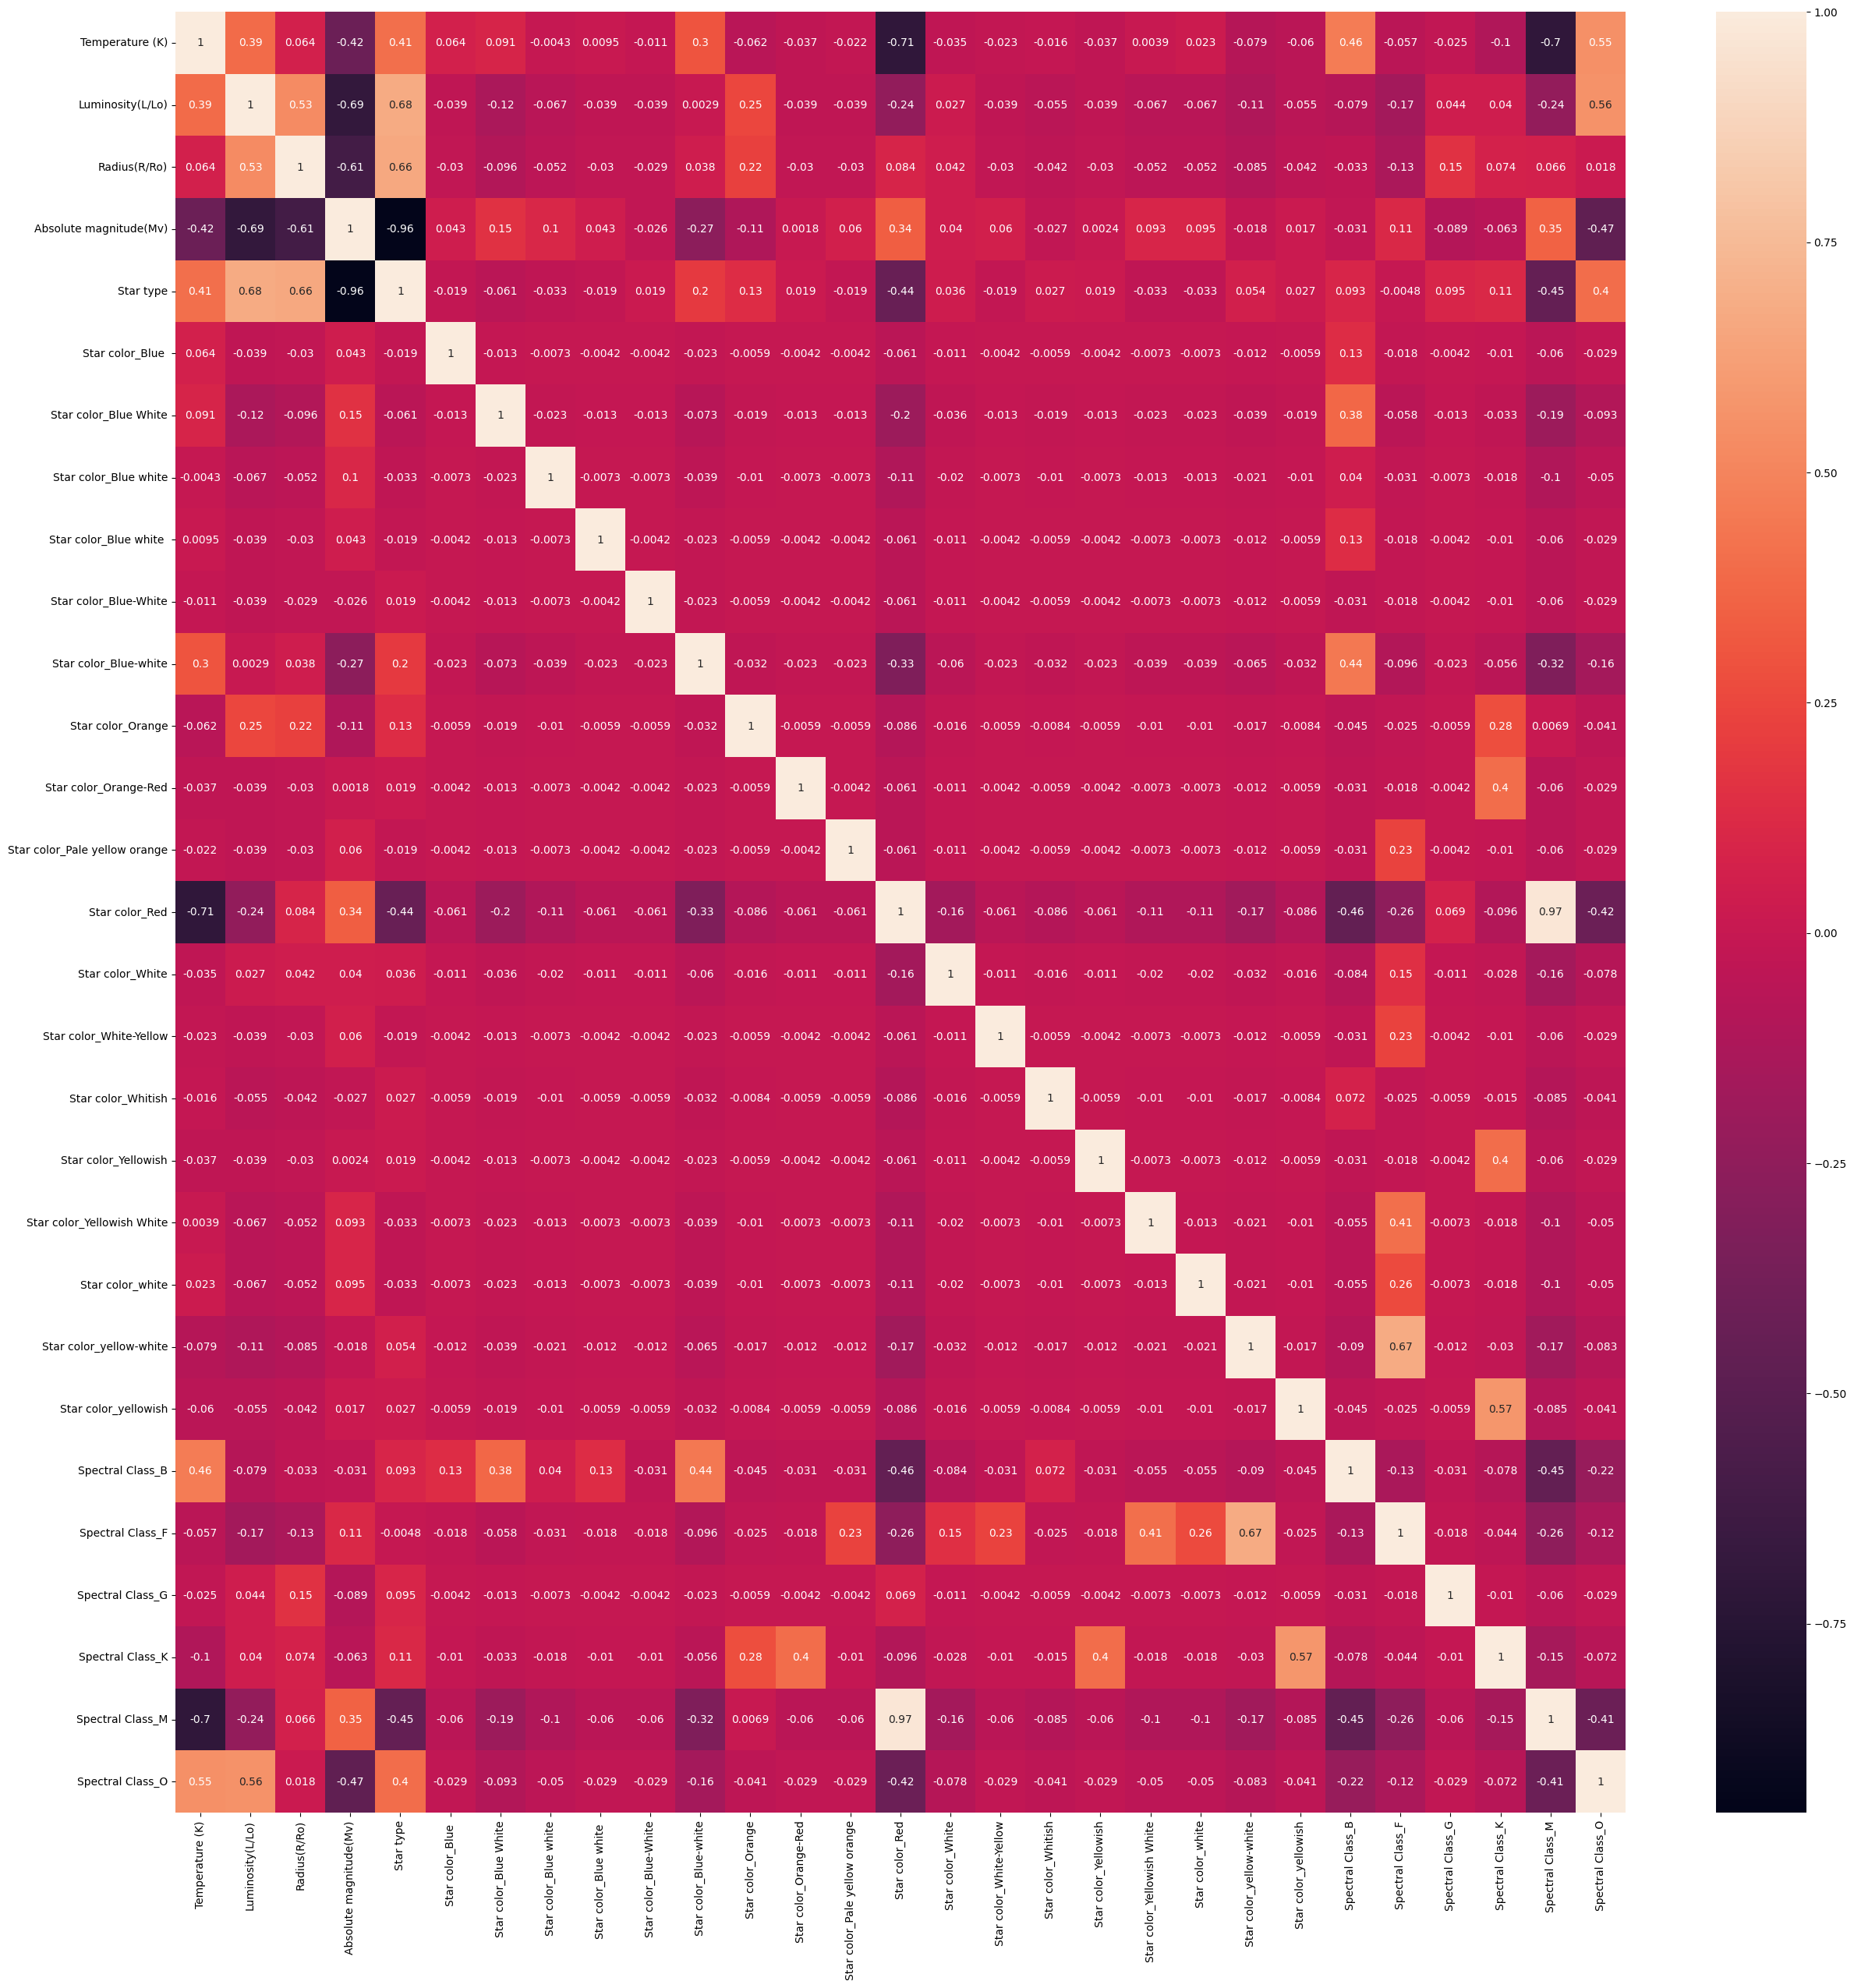

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True)
plt.show()


In [ ]:
scaler = MinMaxScaler()
data_rescale = pd.DataFrame(scaler.fit_transform(data.drop('Star type', axis=1)), columns=data.drop('Star type', axis=1).columns)
data_rescale.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,Star color_Blue-White,Star color_Blue-white,...,Star color_Yellowish White,Star color_white,Star color_yellow-white,Star color_yellowish,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O
0,0.029663,2.731275e-09,0.000083,0.876798,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.028980,4.944550e-10,0.000075,0.891807,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.017367,2.590003e-10,0.000048,0.957473,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.022622,1.412729e-10,0.000078,0.893371,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,6.828189e-11,0.000049,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X = data_rescale
y = data['Star type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

Model Training and Evaluation

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)

0.96875

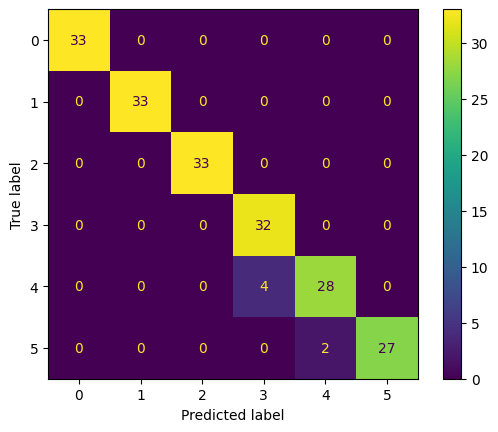

In [ ]:
cfs_mat = confusion_matrix(y_test, dtree.predict(X_test))
disp = ConfusionMatrixDisplay(cfs_mat, display_labels=dtree.classes_)
disp.plot()

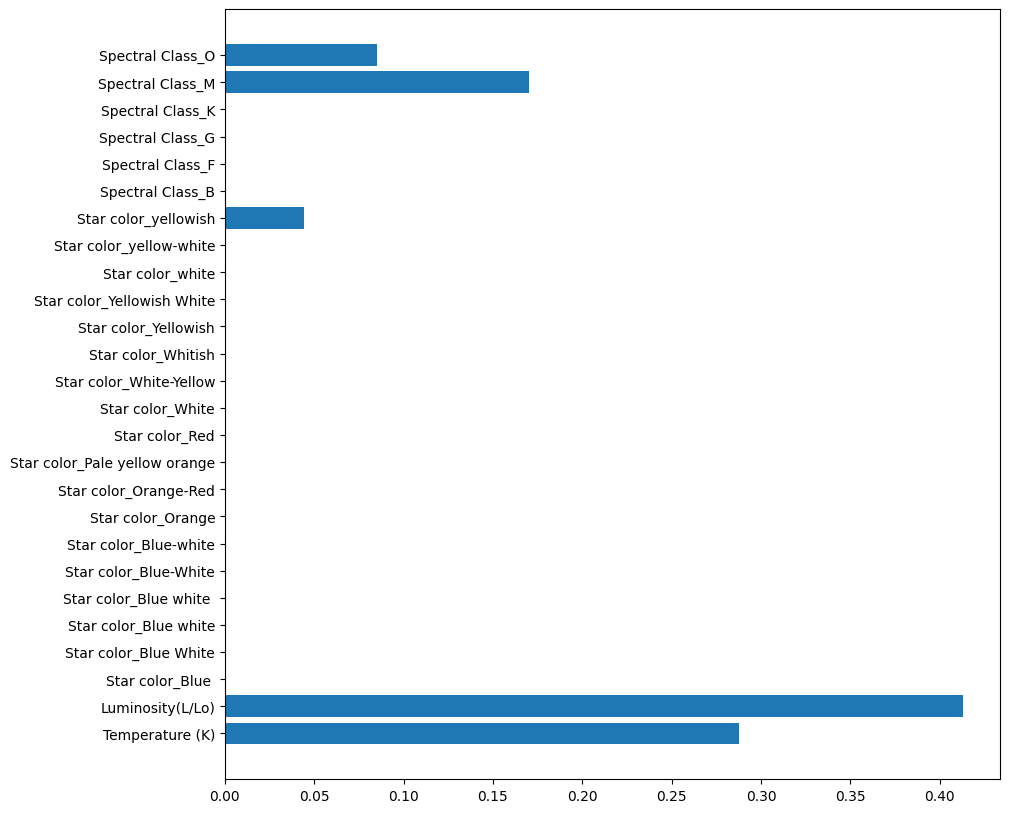

In [ ]:
plt.figure(figsize=(10, 10))
plt.barh(X.columns, dtree.feature_importances_)
plt.show()

Further Analysis and Model Comparison

In [ ]:
X.keys()

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star color_Blue ', 'Star color_Blue White',
       'Star color_Blue white', 'Star color_Blue white ',
       'Star color_Blue-White', 'Star color_Blue-white', 'Star color_Orange',
       'Star color_Orange-Red', 'Star color_Pale yellow orange',
       'Star color_Red', 'Star color_White', 'Star color_White-Yellow',
       'Star color_Whitish', 'Star color_Yellowish',
       'Star color_Yellowish White', 'Star color_white',
       'Star color_yellow-white', 'Star color_yellowish', 'Spectral Class_B',
       'Spectral Class_F', 'Spectral Class_G', 'Spectral Class_K',
       'Spectral Class_M', 'Spectral Class_O'],
      dtype='object')

In [ ]:
X = data_rescale.drop(['Absolute magnitude(Mv)','Radius(R/Ro)'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)

0.8020833333333334

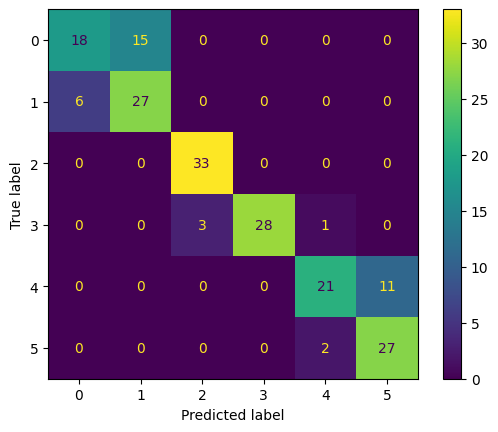

In [ ]:
cfs_mat = confusion_matrix(y_test, dtree.predict(X_test))
disp = ConfusionMatrixDisplay(cfs_mat, display_labels=dtree.classes_)
disp.plot()

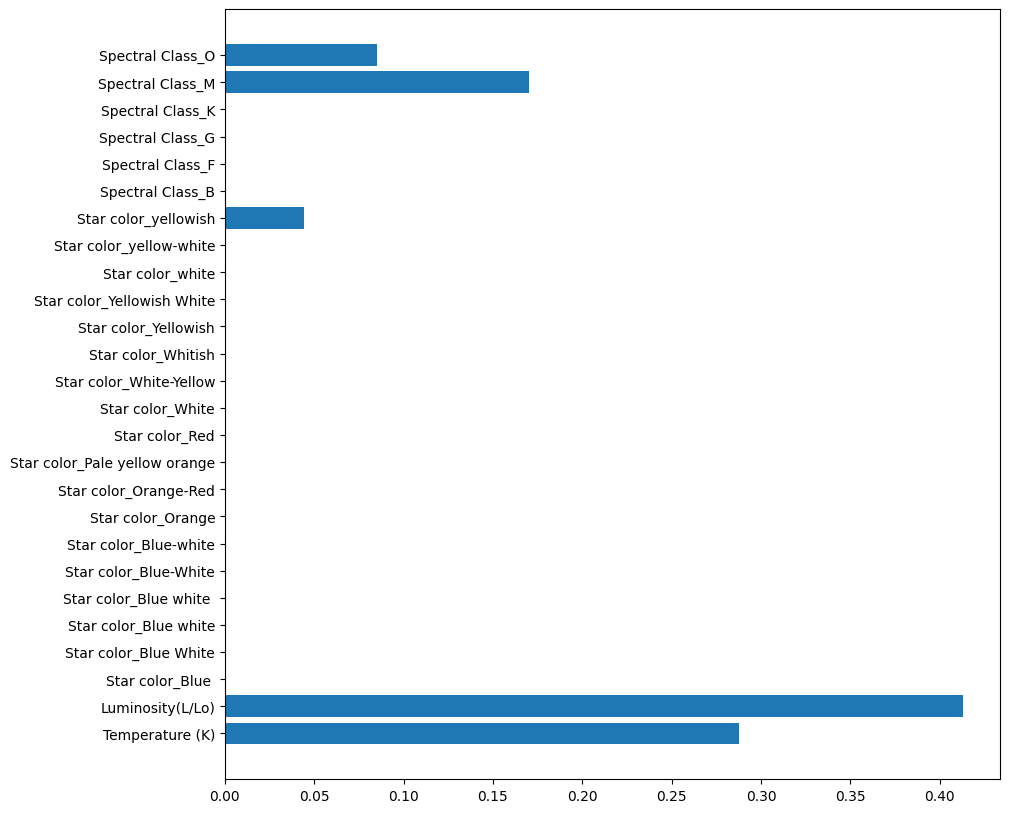

In [ ]:
plt.figure(figsize=(10, 10))
plt.barh(X.columns, dtree.feature_importances_)
plt.show()

0.7916666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


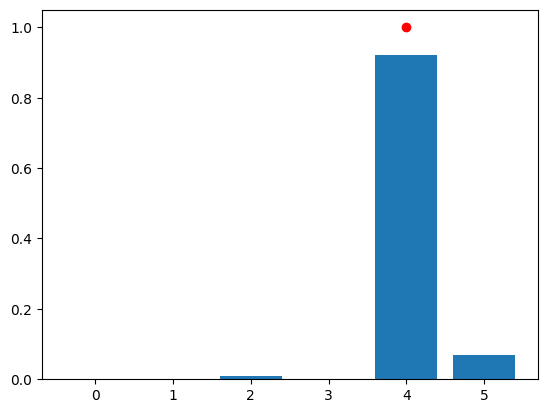

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
x_prob = rf.predict_proba(X_test.iloc[42].values.reshape(1, -1))
plt.bar( rf.classes_,x_prob[0])
plt.scatter(y_test.iloc[42], 1, color='red', alpha=1)

Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dtree, X, y, cv=5)
mean_score = np.mean(scores)

print("Cross-Validation Scores:")
for fold, score in enumerate(scores, start=1):
    print(f"- Fold {fold}: {score}")
print(f"Mean Score: {mean_score}")

Cross-Validation Scores:
- Fold 1: 0.6666666666666666
- Fold 2: 0.7083333333333334
- Fold 3: 0.8125
- Fold 4: 0.875
- Fold 5: 0.7708333333333334
Mean Score: 0.7666666666666667


Data Visualization

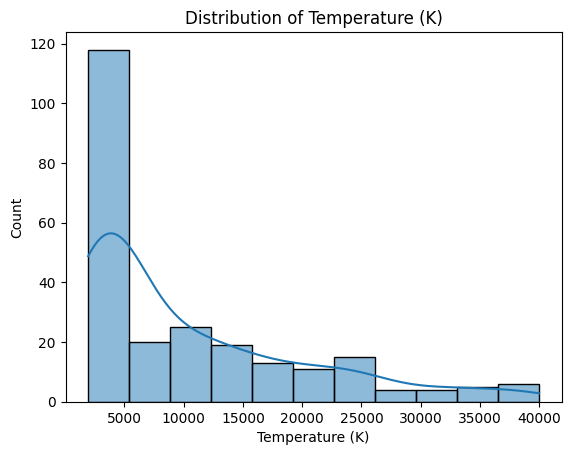

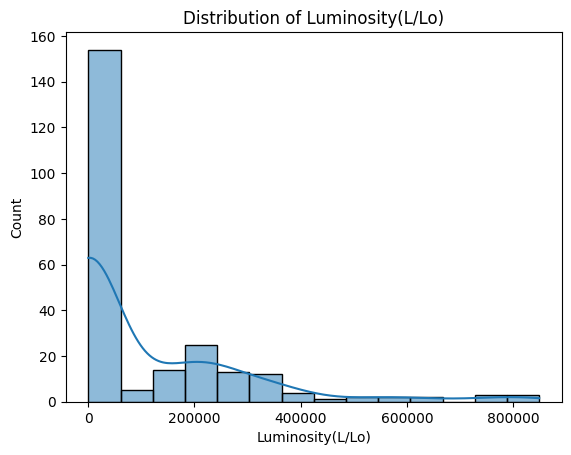

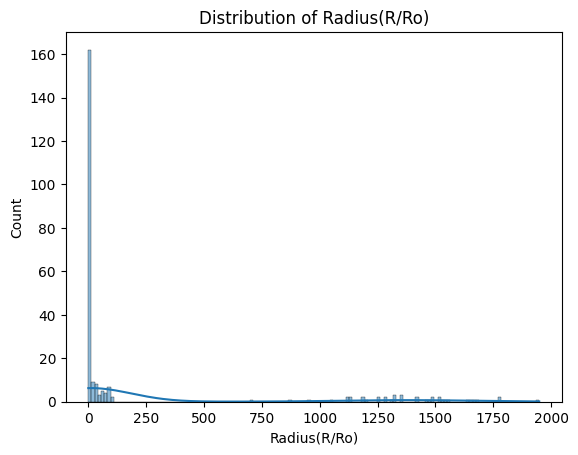

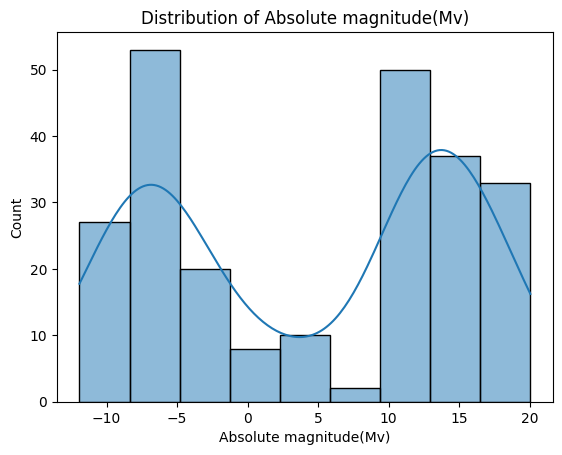

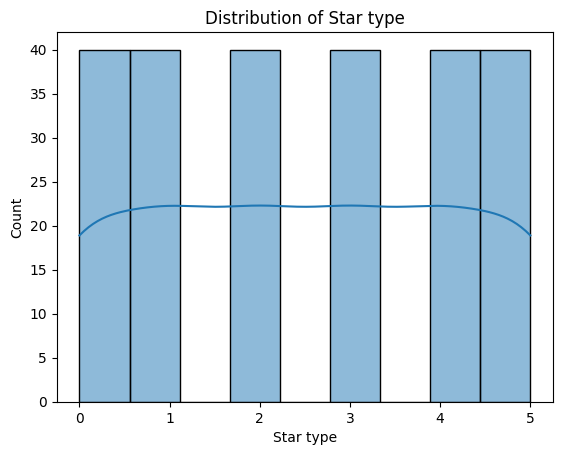

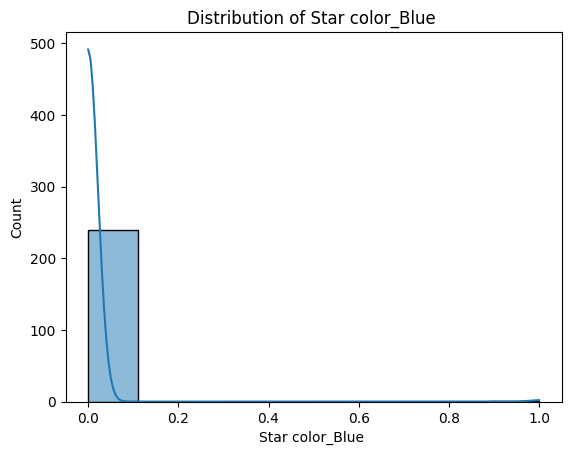

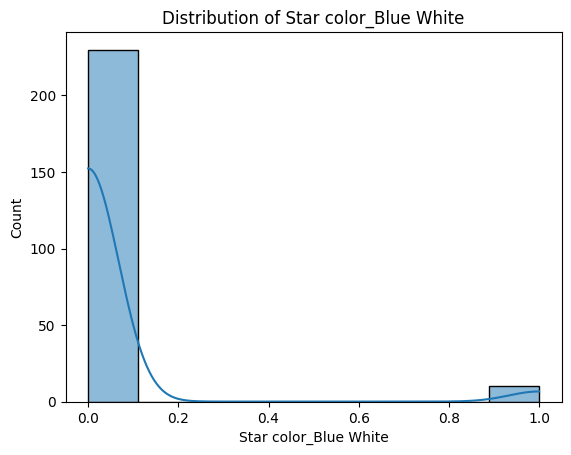

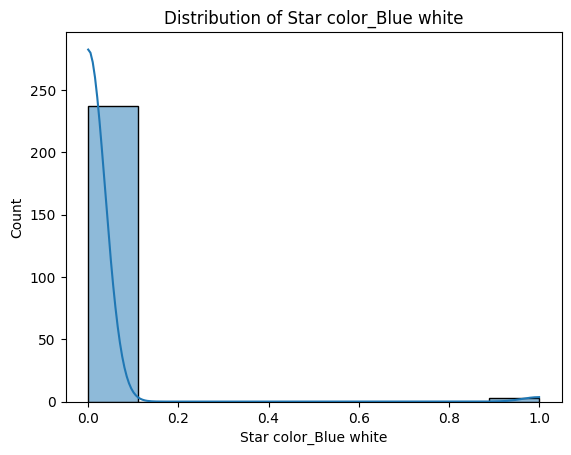

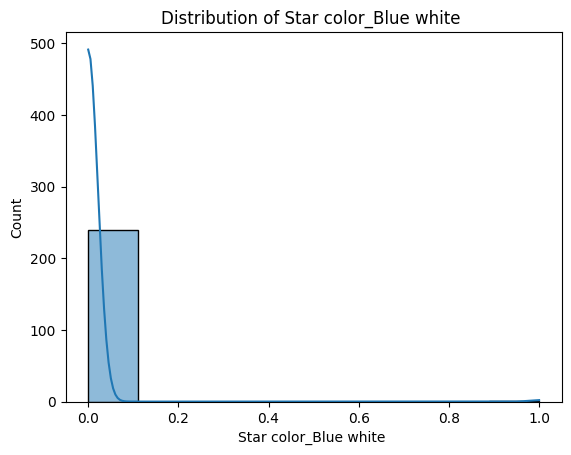

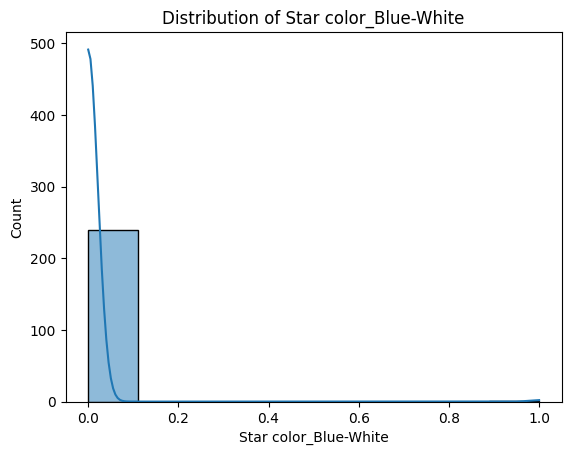

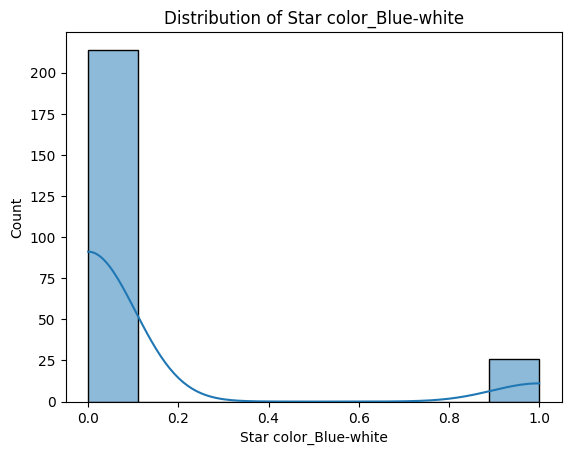

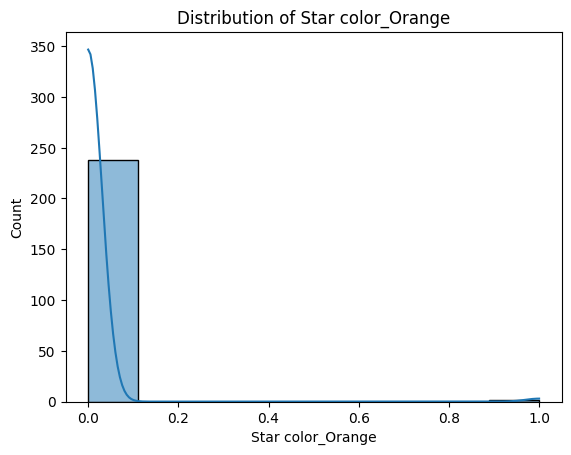

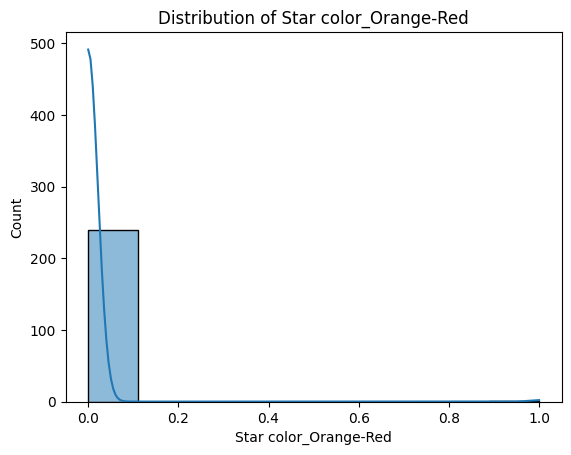

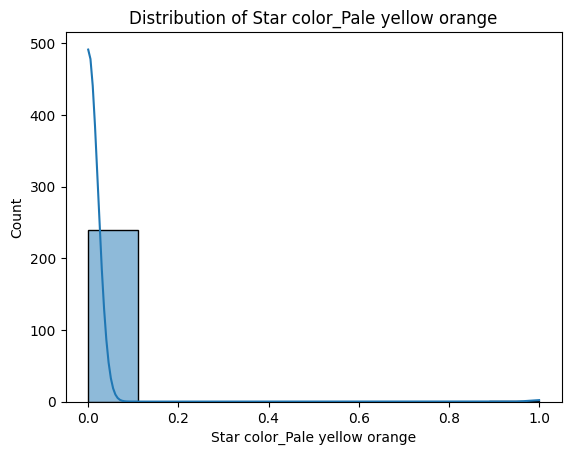

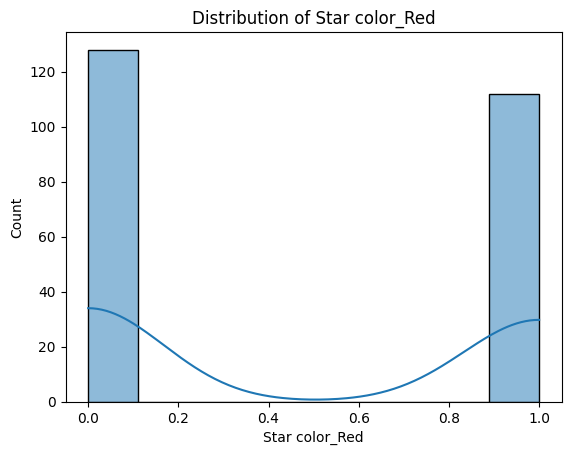

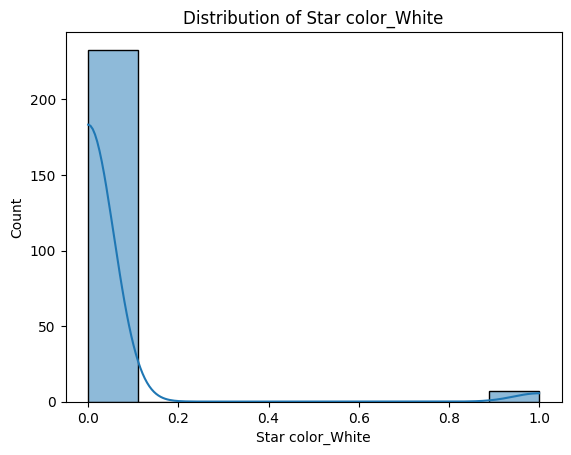

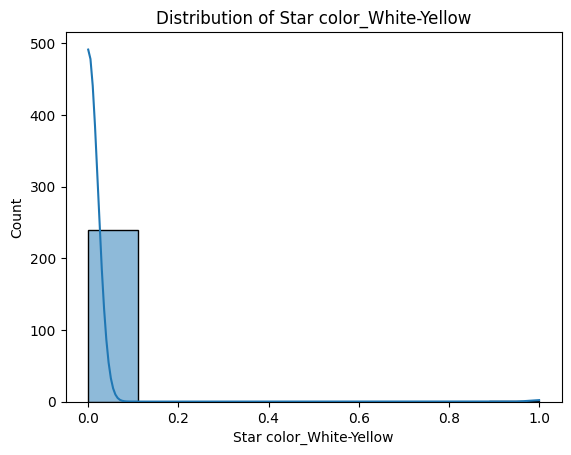

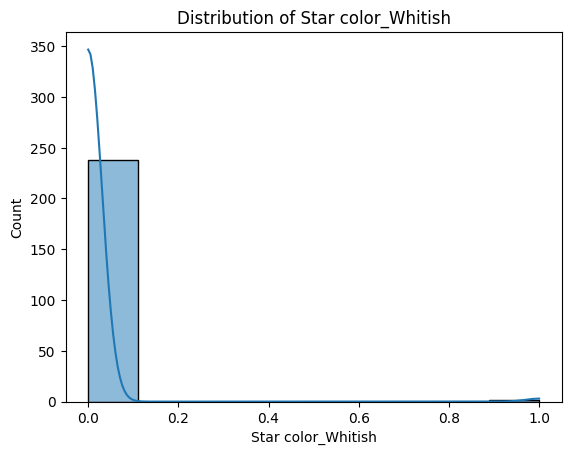

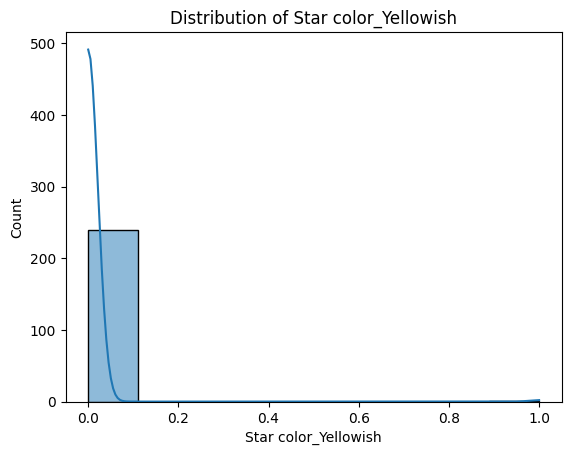

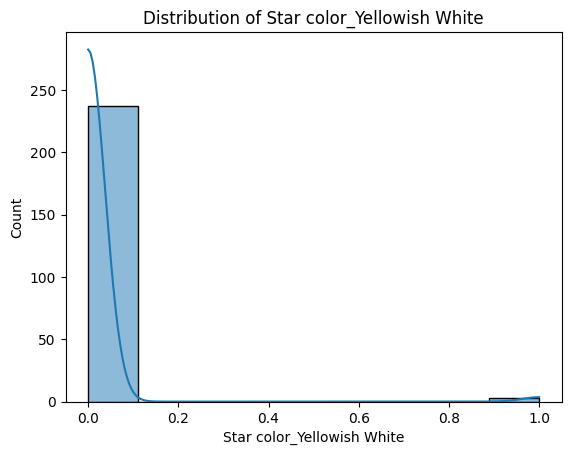

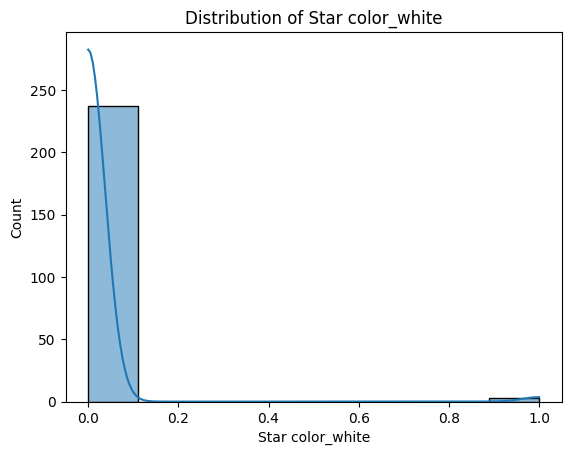

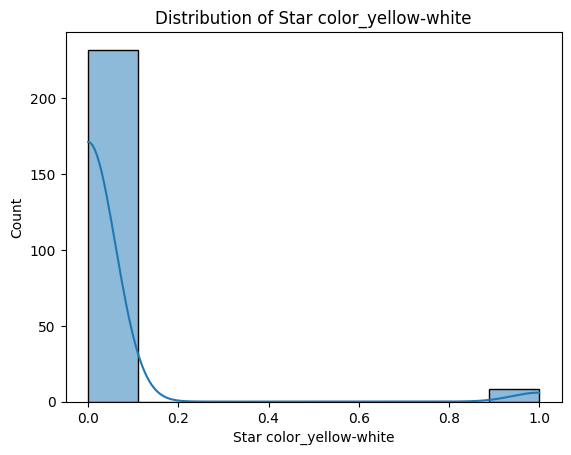

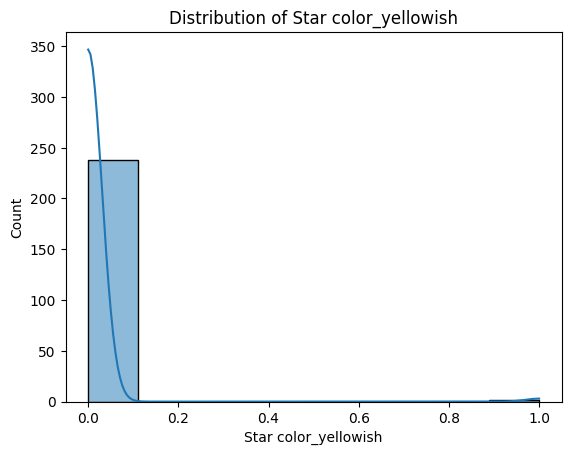

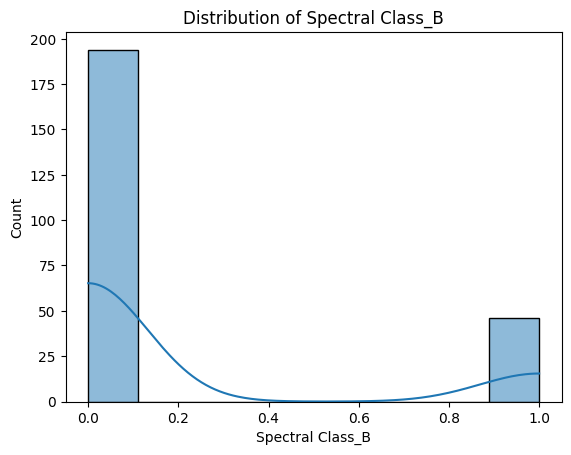

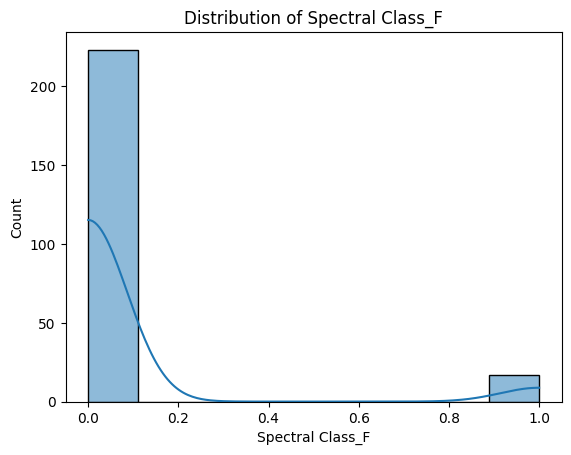

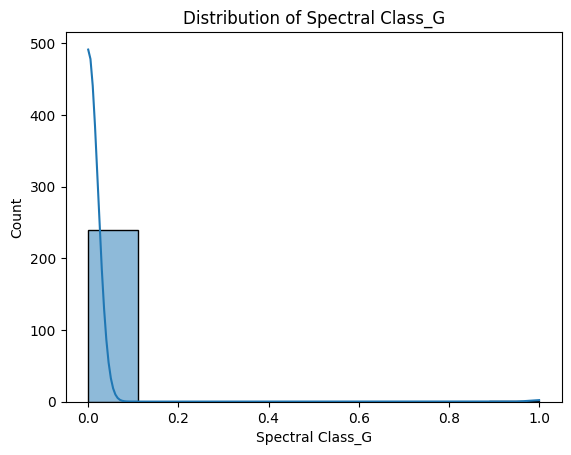

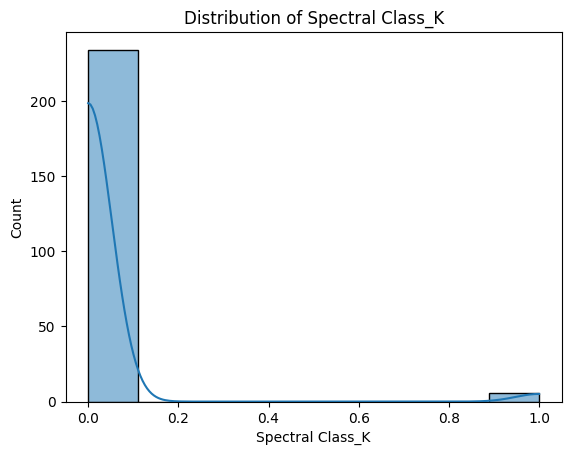

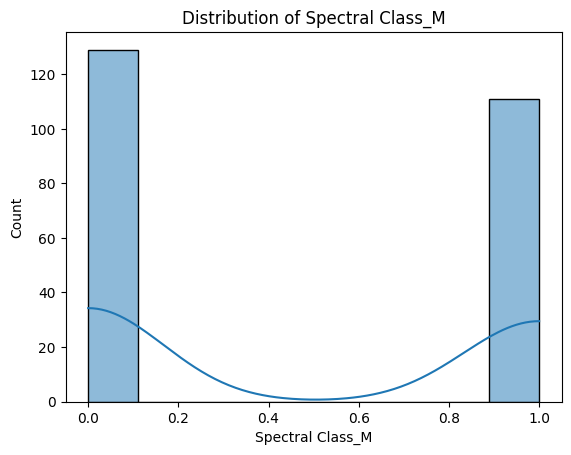

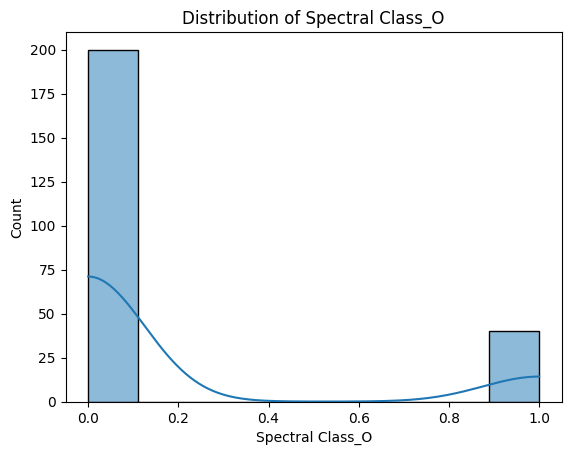

In [ ]:
feature_cols = data.columns

for feature in feature_cols:
    sns.histplot(data=data, x=feature, kde=True)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature}')
    plt.show()

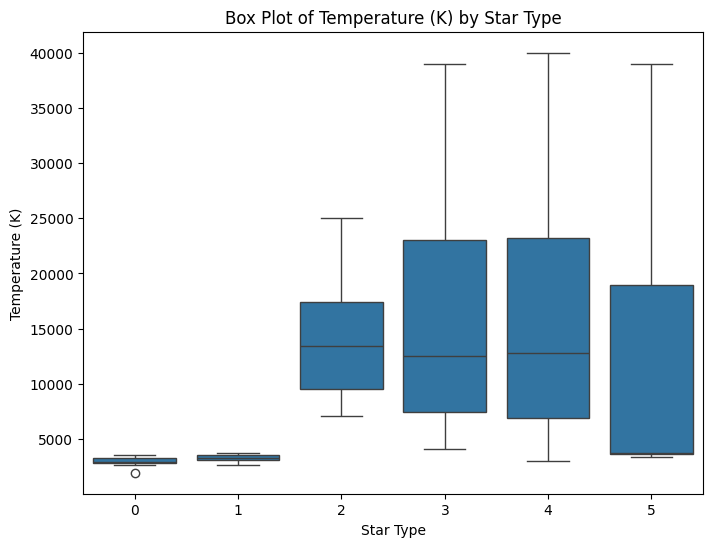

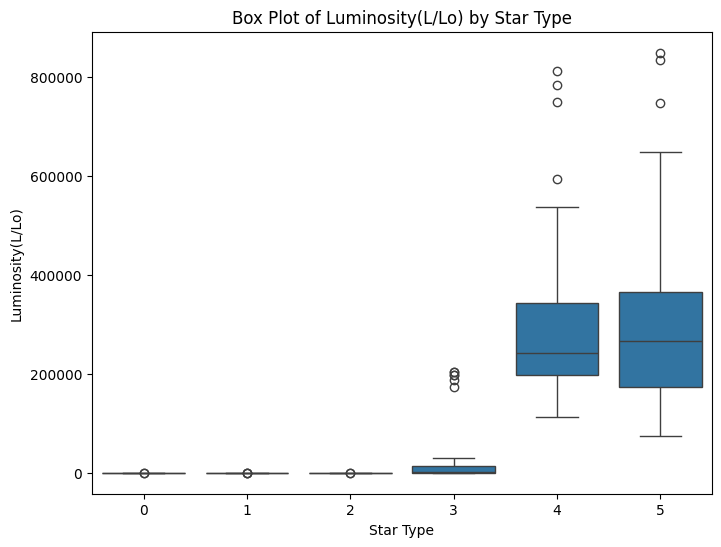

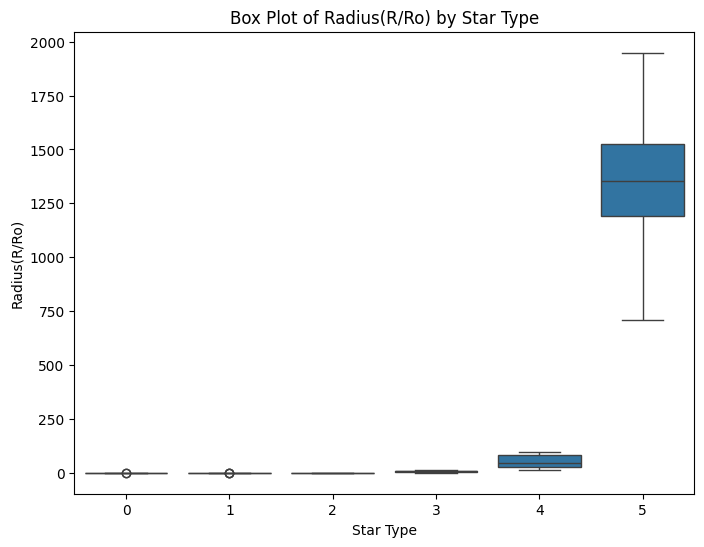

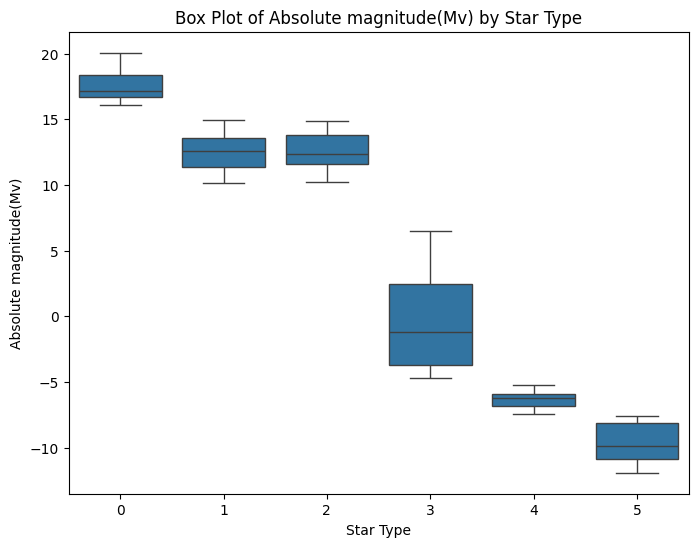

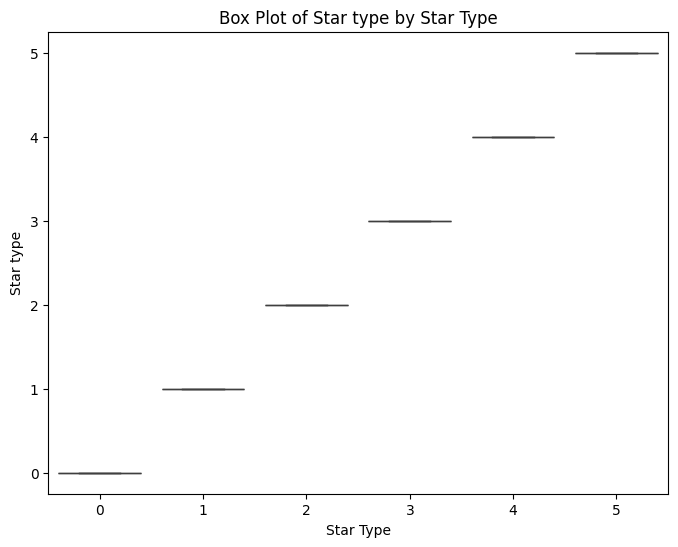

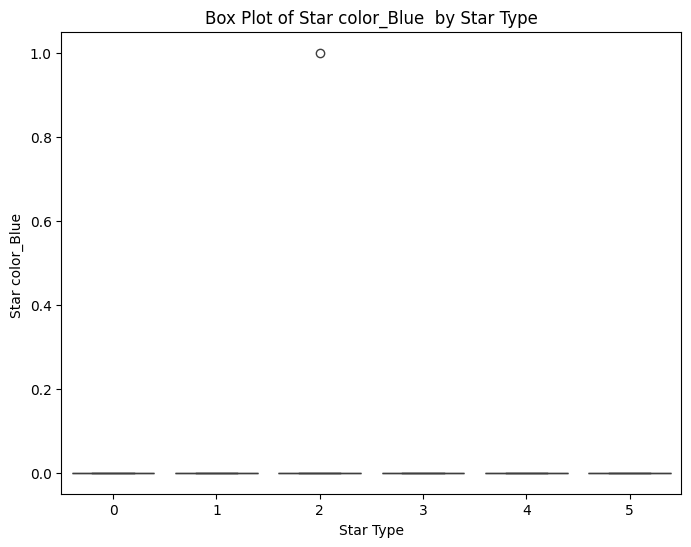

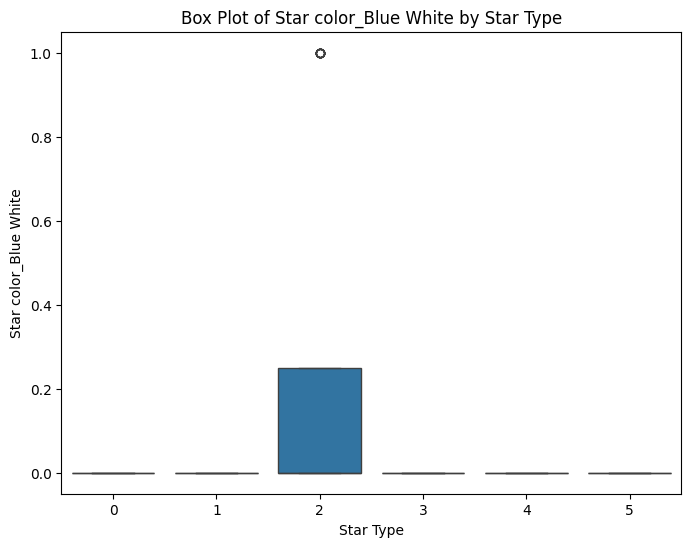

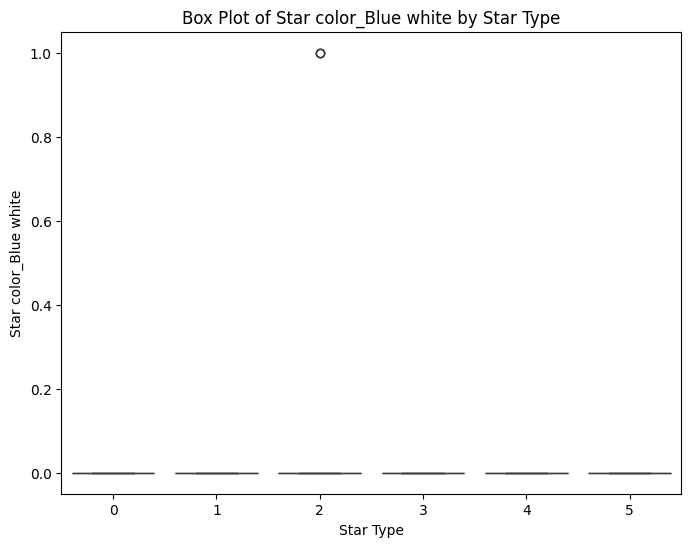

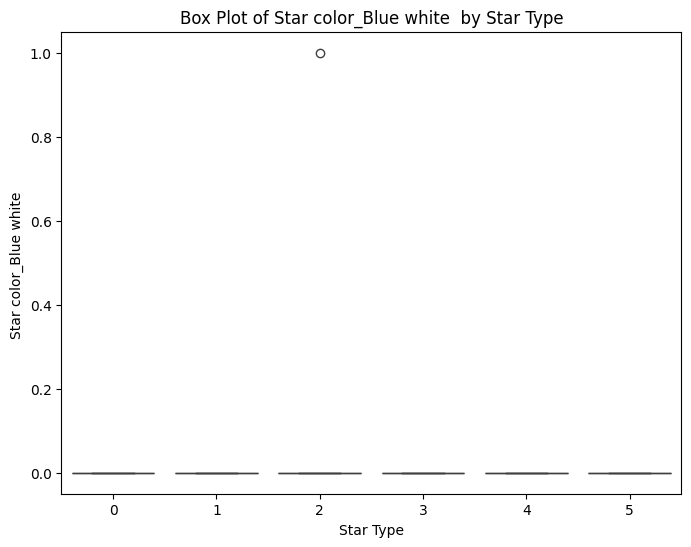

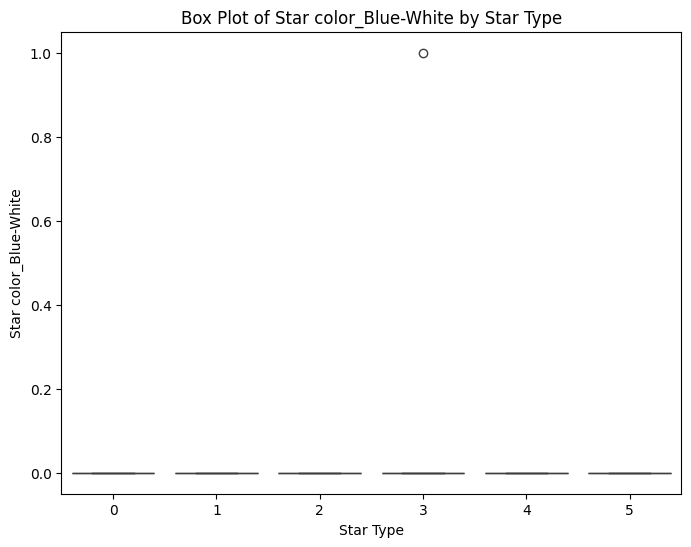

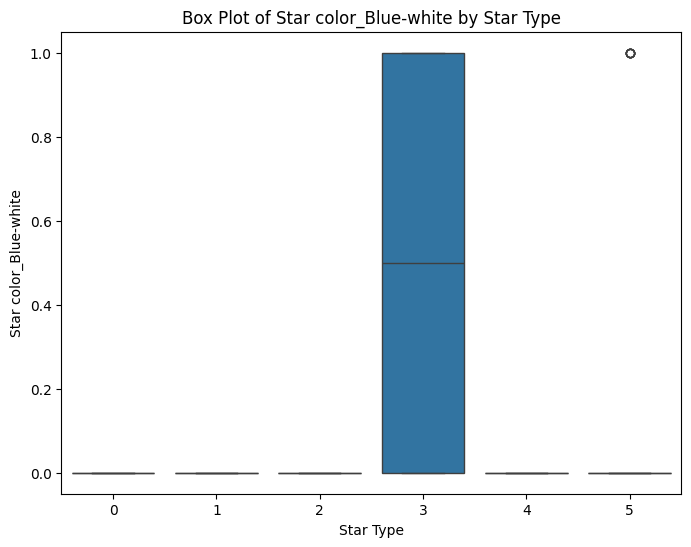

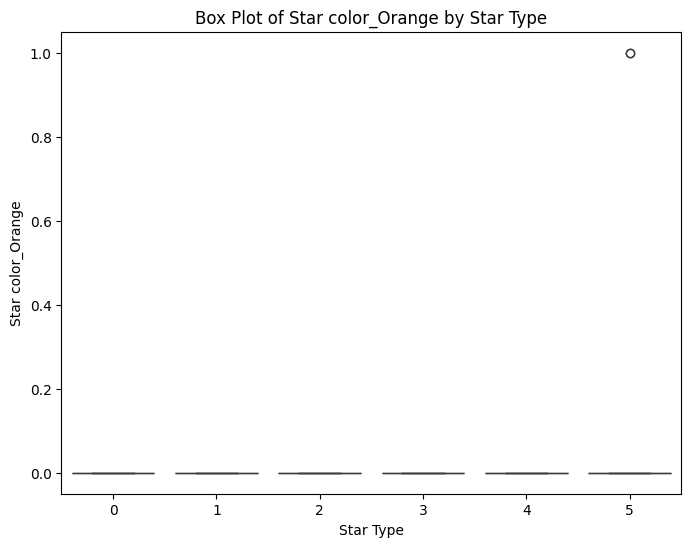

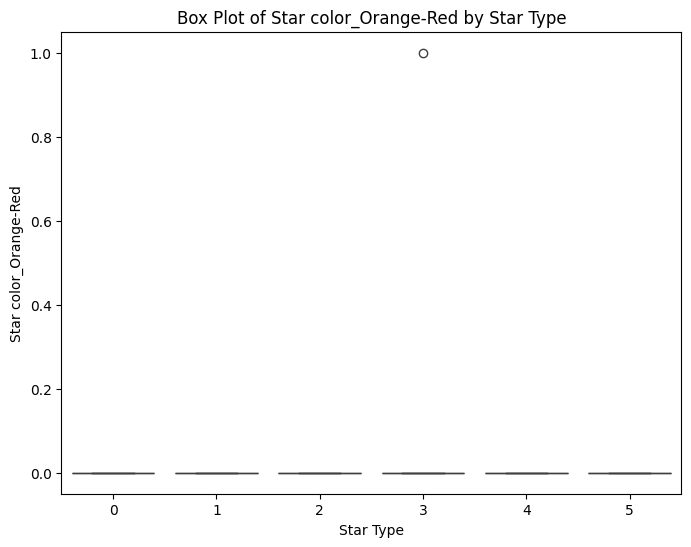

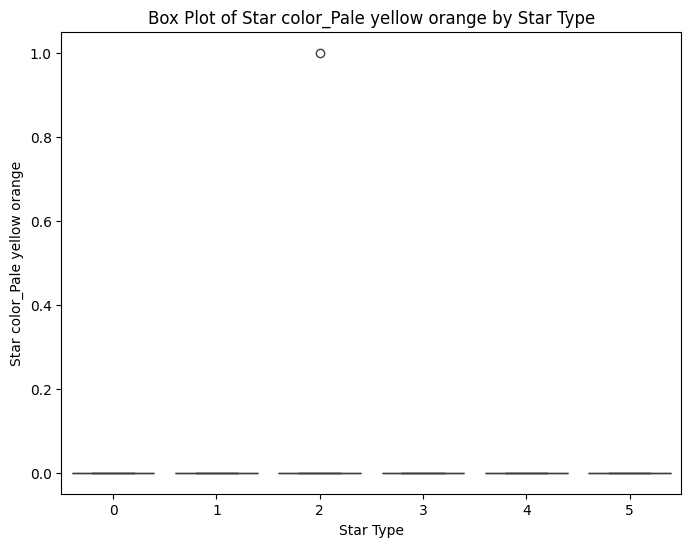

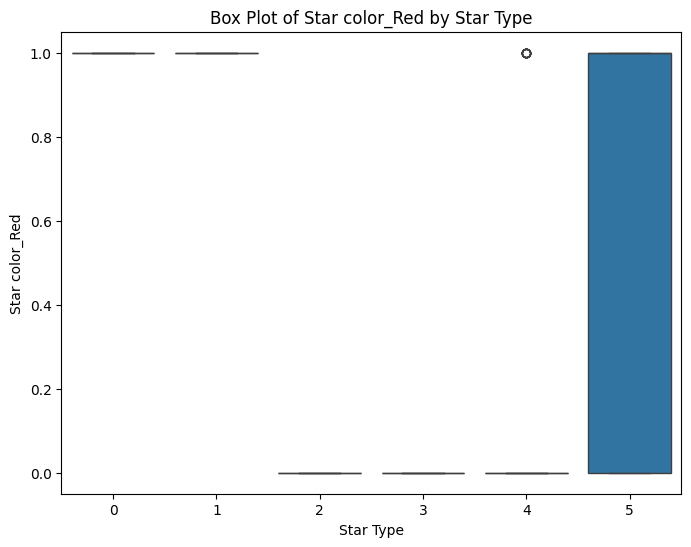

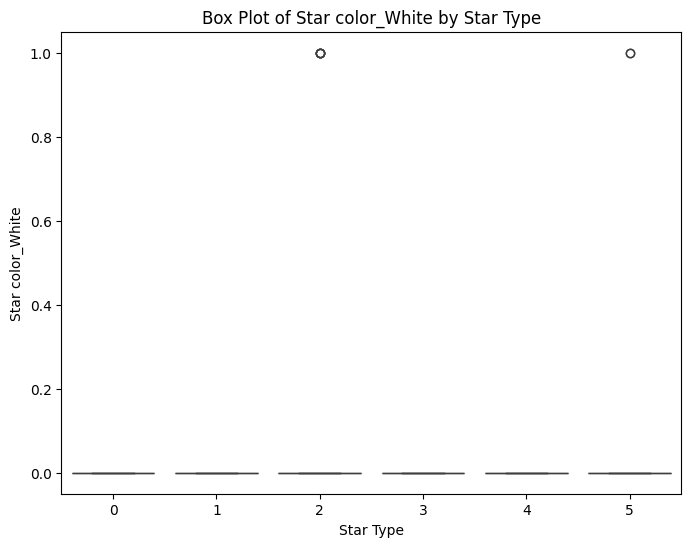

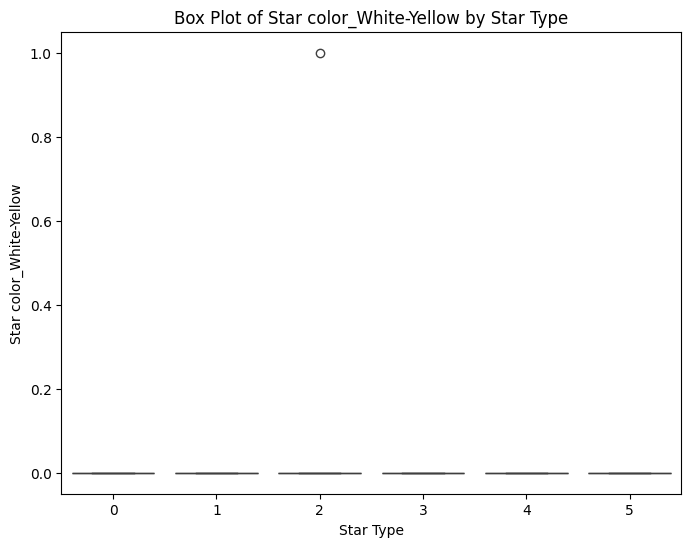

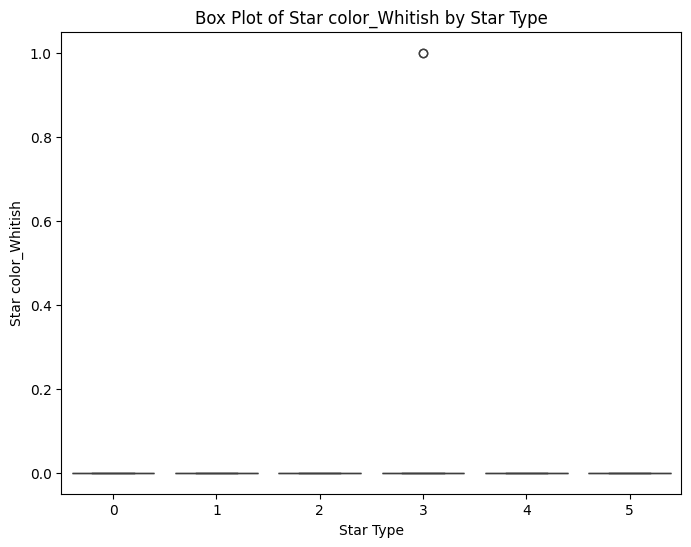

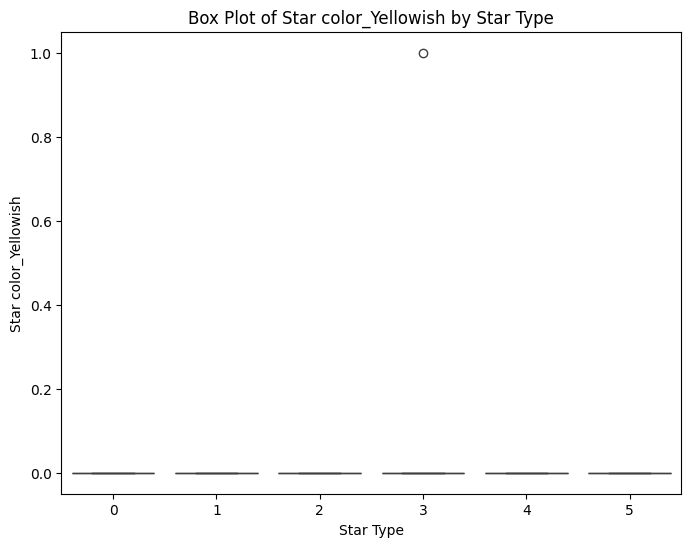

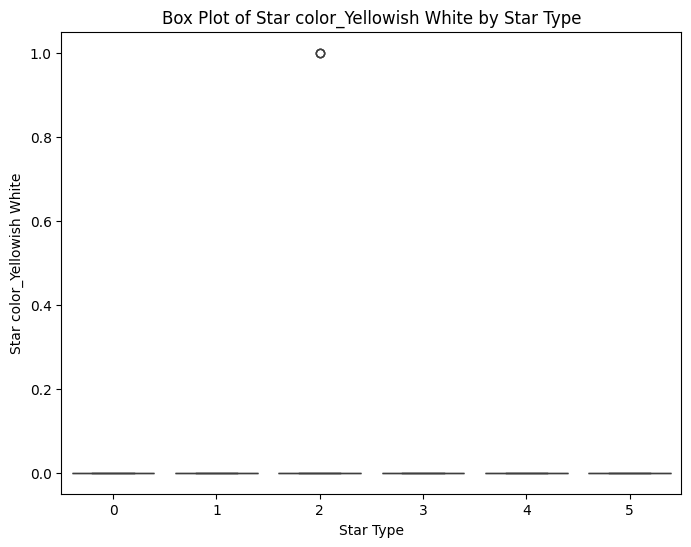

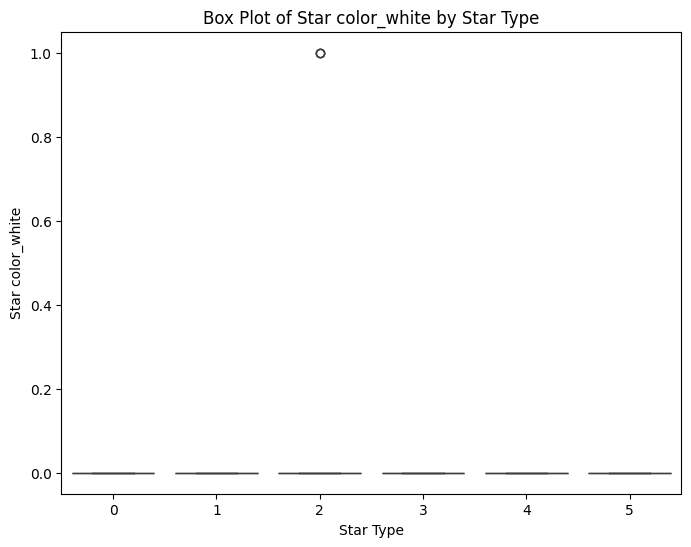

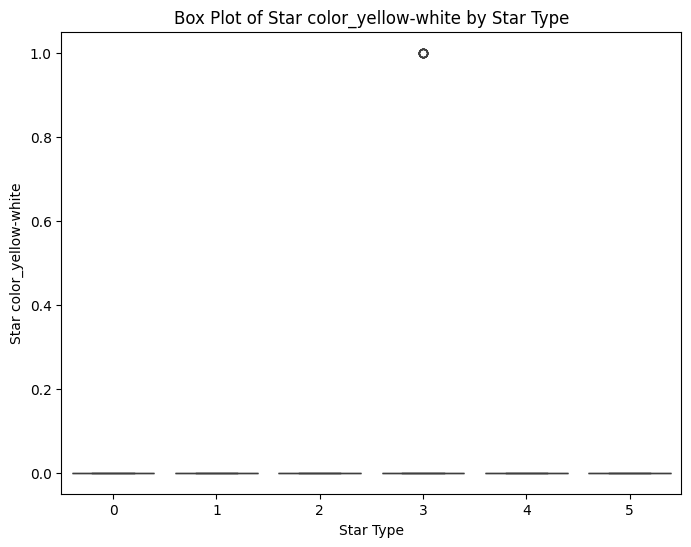

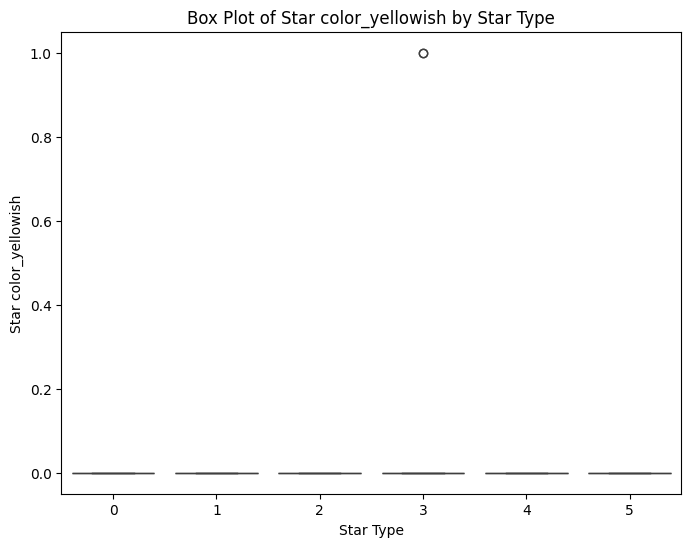

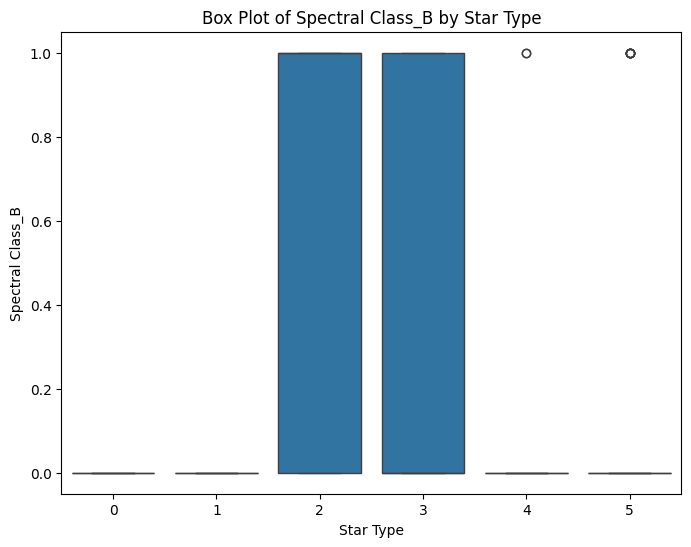

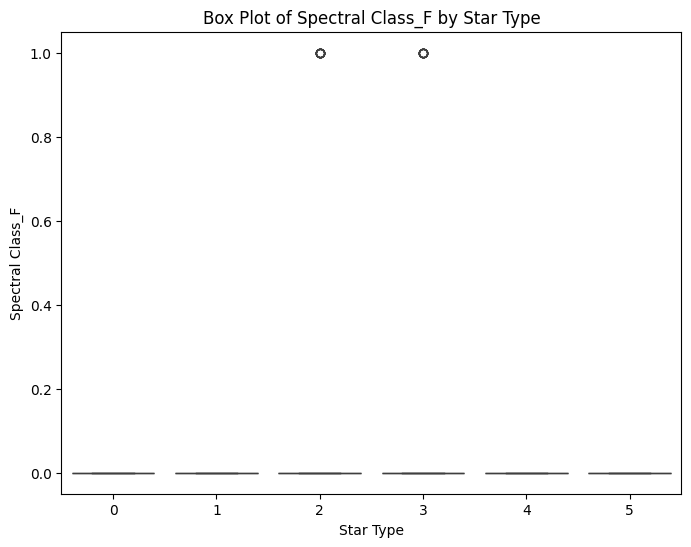

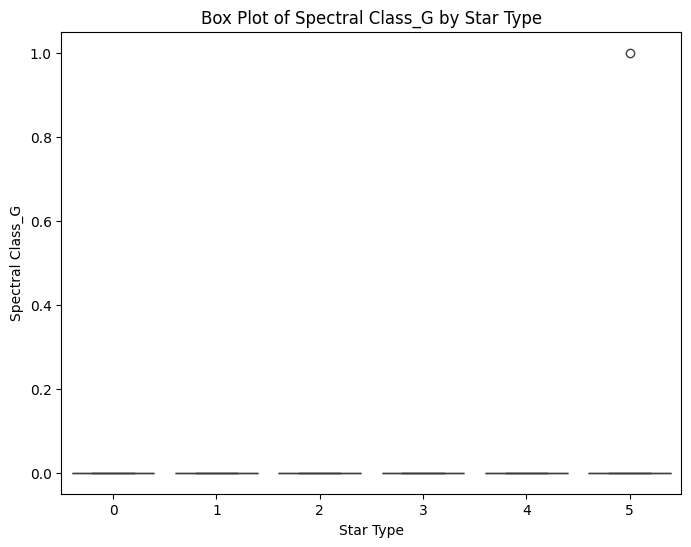

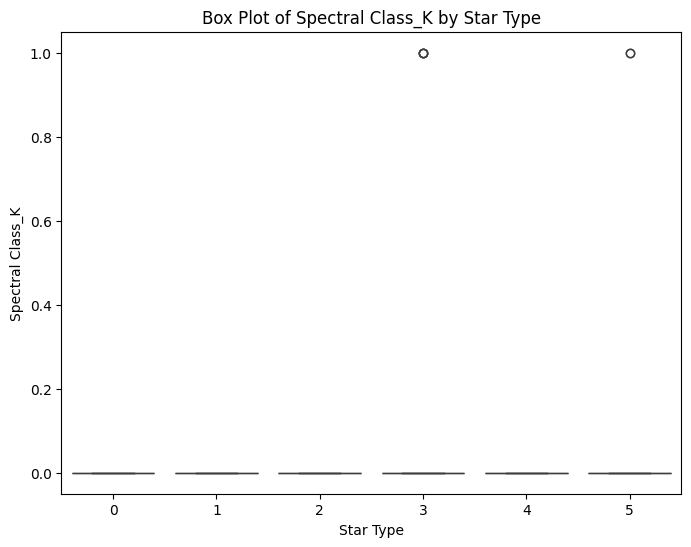

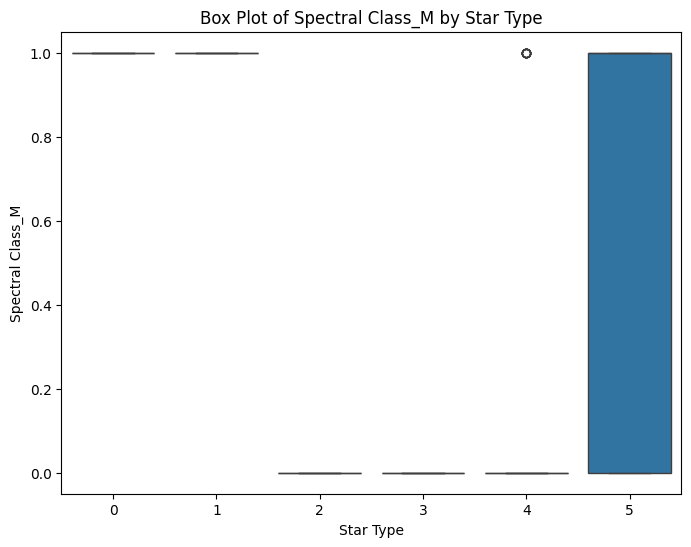

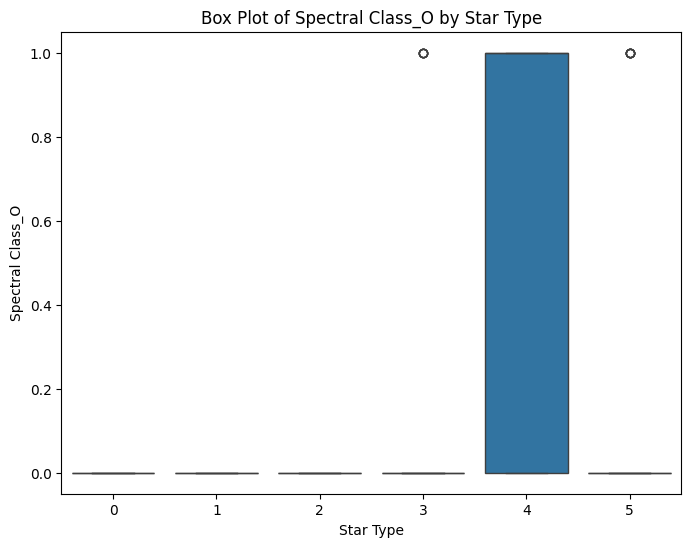

In [ ]:
for feature in feature_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Star type', y=feature, data=data)
    plt.xlabel('Star Type')
    plt.ylabel(feature)
    plt.title(f'Box Plot of {feature} by Star Type')
    plt.show()